# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [16]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
#clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

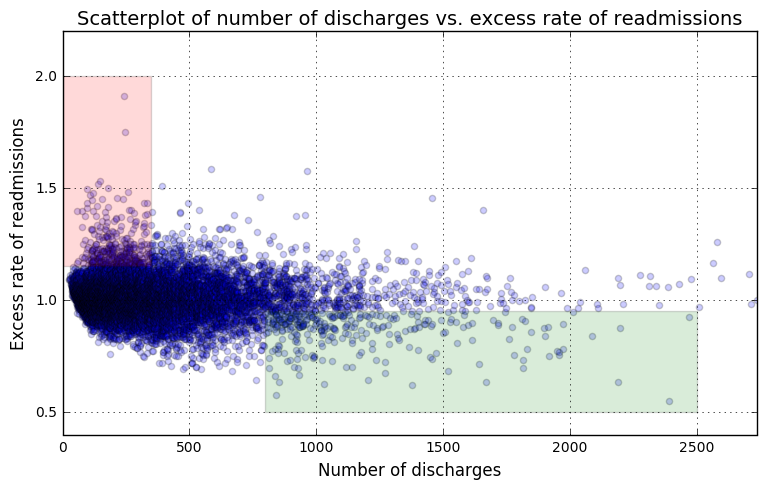

In [8]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [ ]:
#A. Do you agree with the above analysis and recommendations? Why or why not?

#   At first glance, it appears that the analysis hold weight but one problem it
#   didn't address is whether there is enough evidence to conclude is true.
#   So, at this point I can't categorically say that I agree with the conclusion
#   until I conduct a hypothesis test and test the p-value of the sample population.
#   After this test, then I can answer this question.

#B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
#   1. Setup an appropriate hypothesis test.

#   The hypothesis test is basically comprised of a NULL HYPOTHESIS and an ALTERNATIVE HYPOTHESIS.
#   The NULL HYPOTHESIS is usually a statement of 'no effect' or 'no difference' and is the statement
#   being tested based on the p-value of the sample data.  If the p-value is less than or equal to 
#   the level of significance then the NULL HYPOTHESIS can be neglected, which in turn signifies that
#   there is enough evidence in the data to support the ALTERNATIVE HYPOTHESIS.

#   For this particular set of data, looking at the scatter plot, it appears that there are a lot more 
#   hospitals with a relatively small number of discharges compared to hospitals with a large number
#   of discharges.  We can equate this arbitrarily to small hospitals vs. large hospitals.

#   Since the original conclusion correlate hospital capacity (number of discharges) with readmission rate,
#   an appropriate null hypothesis should involve these two:

#   NULL HYPOTHESIS:
#   Ho:μ1=μ2 where μ1 is the average rate of readmission of hospitals with < 100 discharges
#            and μ2 is the average rate of readmission of hospitals with > 1000 discharges.
#   In other words, the null hypothesis states that there is no difference in the average rate
#   of readmissions between hospitals with less than 100 discharges or hospitals with greater than 1000 discharges.

#   ALTERNATIVE HYPOTHESIS:
#   Ho:μ1≠μ2 where μ1 is the average rate of readmission of hospitals with < 100 discharges
#            and μ2 is the average rate of readmission of hospitals with > 1000 discharges.
#   In other words, the alternative hypothesis states that there is a significant difference
#   in average hospital readmission rates in hospitals with less than 100 discharges and hospitals
#   with greater than 1000 discharges.


In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import scipy.stats as st
from mpl_toolkits.axes_grid1 import make_axes_locatable

# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

# Set-up the hypothesis test. 
# Get the two groups of hospitals. One with less than 100 discharges and the other with > 1000 discharges.
# Get the hospitals with small discharges first.  First statement deals with missing data. 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
hosp_with_small_discharges = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'].astype(int) < 100]
hosp_with_small_discharges = hosp_with_small_discharges[hosp_with_small_discharges['Number of Discharges'].astype(int) != 0]
hosp_with_small_discharges.sort_values(by = 'Number of Discharges', ascending = False)

# Now get the hospitals with relatively large discharges.
hosp_with_large_discharges = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'].astype(int) > 1000]
hosp_with_large_discharges = hosp_with_large_discharges[hosp_with_large_discharges['Number of Discharges'].astype(int) != 0]
hosp_with_large_discharges.sort_values(by = 'Number of Discharges', ascending = False)

# Now calculate the statistical significance and p-value
small_hospitals = hosp_with_small_discharges['Excess Readmission Ratio']
large_hospitals = hosp_with_large_discharges['Excess Readmission Ratio']
result = st.ttest_ind(small_hospitals,large_hospitals, equal_var=False)
print("Statistical significance is equal to : %6.4F, P-value is equal to: %5.14F" % (result[0],result[1]))

Statistical significance is equal to : 7.6017, P-value is equal to: 0.00000000000013


In [ ]:
#3. Report statistical significance for α = .01:
    
#   Since the  P-value < 0.01, we can reject the null hypothesis that states 
#   that there are no significant differences between the two hospital groups
#   originally mentioned in conclusion.

#4. Discuss statistical significance and practical significance:
    
#   The hypothesis test has shown that there is a difference 
#   between the two groups being compared in the preliminary report, that of hospitals
#   with readmissions rate < 100 and hospitals with readmissions rate > 1000.
#   It may be that the difference between the two groups is not practically
#   significant since the samples we used are quite large and 
#   large sample sizes can make hypothesis testing very sensitive to even slight 
#   differences in the data. The hypothesis test prove that there is a strong 
#   level of confidence that the samples are not statistically 
#   identical. 
    
#5. Look at the scatterplot above. 
#     What are the advantages and disadvantages of using this plot to convey information?
    
#     To me, the main advantage of a scatterplot is the range of data flow,i.e., the maximum
#     and minimum values can be easily determined.  And also, one can easily see the relationship
#     between two variables. But the one drawback to it is that one can not qualitatively visualize
#     the significance in differences.
    
#6.  Construct another plot that conveys the same information in a more direct manner:
    
#    Below I've constructed a hexabog binning plot that can easily show the relative counts
#    of a combination of data points for readmission rate and number of discharges.

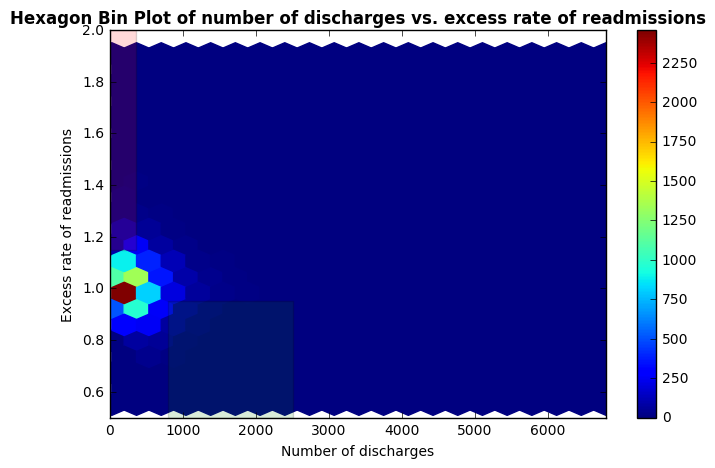

In [15]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
im = ax.hexbin(x, y,gridsize=20)
fig.colorbar(im, ax=ax)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlabel('Number of discharges', fontsize=10)
ax.set_ylabel('Excess rate of readmissions', fontsize=10)
ax.set_title('Hexagon Bin Plot of number of discharges vs. excess rate of readmissions', fontsize=12, fontweight='bold')
